# How to scrap a website (no pain - no gain)

Основные библиотеки (названия кликабельны - рекомендую почитать)

- **[`requests`](http://docs.python-requests.org/en/master/#)** 

Прекрасная библиотека для создания собственных запросов к серверам, которую мы будем использовать для получения сырого, необработанного, страшного и путанного HTML кода страницы 


- **[`re`](https://docs.python.org/2/library/re.html)** 

Не менее прекрасная библиотека, позволяющая вам использовать регулярные выражения. Если вы хотите подробнее поизучать регулярные выражения, а не только гуглить на стаковерфлоу необходимые вам паттерны, как делаю я, то вот идеальный сайт для изучения - http://regexr.com/

- **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup**

Красивый суп. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
import sys

### Так выглядит наша главная ссылка, по которой мы будем в дальнейшем гулять, добавляя новые значения для страницы

In [2]:
main_url = 'https://slon.ru/news?page='

In [3]:
page = 1

Если склеить два кусочка - мы получим наш url!

In [4]:
main_url+str(page)

'https://slon.ru/news?page=1'

Благословенный 200 ответ - соединение установлено и данные получены, всё чудесно!

In [5]:
requests.get(main_url+str(page))

<Response [200]>

Создадим переменную, которая будет держать HTML код нашей полученной страницы

In [6]:
news_page = requests.get(main_url+str(page))
news_page = news_page.content

In [7]:
news_page

'<!DOCTYPE html>\n<html>\n<head>\n    <title>\xd0\x9d\xd0\xbe\xd0\xb2\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8 \xd0\xbd\xd0\xb0 Slon.ru</title>\n\n    <!-- Hello, stranger! What are you doing here? ( \xcd\xa1\xc2\xb0 \xcd\x9c\xca\x96 \xcd\xa1\xc2\xb0) -->\n\n    <meta charset="UTF-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UAEGUFNVGwUCVFdSAwI="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("interna

In [8]:
news_page = BeautifulSoup(news_page, 'lxml')

### Стало намного лучше, не правда ли?

In [9]:
news_page

<!DOCTYPE html>\n<html>\n<head>\n<title>\u041d\u043e\u0432\u043e\u0441\u0442\u0438 \u043d\u0430 Slon.ru</title>\n<!-- Hello, stranger! What are you doing here? ( \u0361\xb0 \u035c\u0296 \u0361\xb0) -->\n<meta charset="unicode-escape"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UAEGUFNVGwUCVFdSAwI="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(15),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.

### Зато теперь зная "адрес" элемента на странице мы сможем находить его в этой куче добра

In [21]:
print(news_page.find('h6', attrs = {'class':"line-post-headline "}))

<h6 class="line-post-headline ">
                                                Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
                                                                                            </h6>


In [23]:
for newshead in news_page.findAll('h6', attrs = {'class':"line-post-headline "}):
    print(newshead)

<h6 class="line-post-headline ">
                                                Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
                                                                                            </h6>
<h6 class="line-post-headline ">
                                                Fitch улучшило прогноз по рейтингу России до «стабильного»
                                                                                            </h6>
<h6 class="line-post-headline ">
                                                СМИ сообщили об обысках в магазине «ЛитРес»
                                                                                            </h6>
<h6 class="line-post-headline ">
                                                СМИ сообщили о задержании бывшего мирового судьи за стрельбу в Хасавюрте
                                                                                            </h6>
<h6 class="line-post-headline ">
           






Но что-то явно мешает...А что если убрать не несущие никакой информации и ценности HTML тэги?

In [24]:
def html_stripper(text):
    return re.sub('<[^<]+?>', '', str(text)) # очень крутые регулярные выражения - убирают все скобочки, тэги и прочую ерунду

In [25]:
for newshead in news_page.findAll('h6', attrs = {'class':"line-post-headline "}):
    print(html_stripper(newshead))


                                                Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
                                                                                            

                                                Fitch улучшило прогноз по рейтингу России до «стабильного»
                                                                                            

                                                СМИ сообщили об обысках в магазине «ЛитРес»
                                                                                            

                                                СМИ сообщили о задержании бывшего мирового судьи за стрельбу в Хасавюрте
                                                                                            

                                                От владельцев иностранных счетов стали требовать лично прийти в налоговую
                                                                     

## Итак, мы достали заголовки! Но на этом мы точно не остановимся - идём вглубь страницы

In [121]:
news_link = news_page.find('article', attrs= {'class':'news-line'})

In [122]:
news_link

<article class="news-line">\n<a href="/posts/74927">\n<div class="line-content">\n<div class="line-post-label">\n                                                                                                    01:31\n                                                                                            </div>\n<h6 class="line-post-headline ">\n                                                \u0412\u043b\u0430\u0441\u0442\u0438 \u0421\u0428\u0410 \u0437\u0430\u043f\u0440\u0435\u0442\u0438\u043b\u0438 \u043f\u0440\u043e\u043d\u043e\u0441\u0438\u0442\u044c Samsung Galaxy Note 7\xa0\u0432\xa0\u0441\u0430\u043c\u043e\u043b\u0435\u0442\u044b\n                                                                                            </h6>\n</div>\n</a>\n</article>

In [123]:
print(news_link)

<article class="news-line">
<a href="/posts/74927">
<div class="line-content">
<div class="line-post-label">
                                                                                                    01:31
                                                                                            </div>
<h6 class="line-post-headline ">
                                                Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
                                                                                            </h6>
</div>
</a>
</article>


### А вот и недостающая часть для нашей ссылки на страницу
Теперь мы сможем перейти и на нее, но сначала стоит очистить её от мусора. В этом нам поможет импортированная библиотека `re`

In [124]:
pattern = '<a href="|">' # вертикальная палочка обозначает логический оператор "ИЛИ", 
                         # то есть мы будем делить нашу строку по любому из этих элементов

In [125]:
for i in re.split(pattern, str(news_link)):
    print("Element: {}".format(i))

Element: <article class="news-line
Element: 

Element: /posts/74927
Element: 
<div class="line-content
Element: 
<div class="line-post-label
Element: 
                                                                                                    01:31
                                                                                            </div>
<h6 class="line-post-headline 
Element: 
                                                Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
                                                                                            </h6>
</div>
</a>
</article>


Похоже, нам нужен третий элемент

In [130]:
re.split(pattern, str(news_link))[2]

'/posts/74927'

In [127]:
'https://slon.ru' + re.split(pattern, str(news_link))[2]

'https://slon.ru/posts/74927'

In [51]:
requests.get('https://slon.ru' + re.split(pattern, str(news_link))[2]).content

'<!DOCTYPE html>\n<html>\n<head>\n    <title>\xd0\x92\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd0\xb8 \xd0\xa1\xd0\xa8\xd0\x90 \xd0\xb7\xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd1\x82\xd0\xb8\xd0\xbb\xd0\xb8 \xd0\xbf\xd1\x80\xd0\xbe\xd0\xbd\xd0\xbe\xd1\x81\xd0\xb8\xd1\x82\xd1\x8c Samsung Galaxy Note 7 \xd0\xb2 \xd1\x81\xd0\xb0\xd0\xbc\xd0\xbe\xd0\xbb\xd0\xb5\xd1\x82\xd1\x8b</title>\n\n    <!-- Hello, stranger! What are you doing here? ( \xcd\xa1\xc2\xb0 \xcd\x9c\xca\x96 \xcd\xa1\xc2\xb0) -->\n\n    <meta charset="UTF-8" /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"UAEGUFNVGwUCVFdSAwI="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=

In [53]:
sub_page = requests.get('https://slon.ru' + re.split(pattern, str(news_link))[2]).content
sub_page = BeautifulSoup(sub_page, 'lxml')

In [128]:
def getSubpageLink(news_link):
    pattern = '<a href="|">'
    return 'https://slon.ru' + re.split(pattern, str(news_link))[2]

In [131]:
getSubpageLink(news_link)

'https://slon.ru/posts/74927'

# Дата публикации

In [57]:
print(sub_page.find('div', attrs={'class':'date'}))

<div class="date">
										01:31
									</div>


In [61]:
date = str(sub_page.find('div', attrs={'class':'date'}))

###  Дату мы нашли, однако на сайте есть две возможных записи для даты:
- в случае, если новость опубликована сегодня, она не будет содержать года и месяца, только время
- если новость опубликована не сегодня, формат даты будет полным

In [62]:
date.split()

['<div', 'class="date">', '01:31', '</div>']

In [79]:
other_page = requests.get('https://slon.ru/posts/74926').content
other_page = BeautifulSoup(other_page)
other_page_date = str(other_page.find('div', attrs={'class':'date'})).split()

In [80]:
for i in other_page_date:
    print i

<div
class="date">
14
октября,
23:14
</div>


In [91]:
def getDate(current_page):
    date = str(current_page.find('div', attrs={'class':'date'})).split()
    if len(date) == 4:
        return date[2]
    else:
        return ' '.join(date[2:5])

### похоже, все работает

In [95]:
print(getDate(other_page))

14 октября, 23:14


In [96]:
print(getDate(sub_page))

01:31


# Число просмотров

In [99]:
sub_page.find('span', attrs={'class':'count'})

<span class="count">467</span>

In [100]:
views = sub_page.find('span', attrs={'class':'count'})
views = html_stripper(views)
print(views)

467


In [101]:
def getViews(current_page):
    views = current_page.find('span', attrs={'class':'count'})
    views = html_stripper(views)
    return views

### Кажется, тоже работает

In [102]:
getViews(sub_page)

'467'

In [105]:
getViews(other_page)

'1 848'

# Заголовок
раз уж мы находимя на этой странице - возьмем отсюда и заголовок, чтобы все было в одном месте

In [136]:
print(sub_page.find('h1'))

<h1>Власти США запретили проносить Samsung Galaxy Note 7 в самолеты</h1>


In [139]:
print(html_stripper(sub_page.find('h1')))

Власти США запретили проносить Samsung Galaxy Note 7 в самолеты


In [140]:
def getTitle(current_page):
    return html_stripper(current_page.find('h1'))

In [142]:
print(getTitle(sub_page))

Власти США запретили проносить Samsung Galaxy Note 7 в самолеты


In [143]:
print(getTitle(other_page))

Fitch улучшило прогноз по рейтингу России до «стабильного»


# Попробуем соединить все вместе
попробуем достать все заголовки, даты и просмотры с первой страницы новостей

In [108]:
news_page.findAll('article', attrs= {'class':'news-line'})

[<article class="news-line">\n<a href="/posts/74927">\n<div class="line-content">\n<div class="line-post-label">\n                                                                                                    01:31\n                                                                                            </div>\n<h6 class="line-post-headline ">\n                                                \u0412\u043b\u0430\u0441\u0442\u0438 \u0421\u0428\u0410 \u0437\u0430\u043f\u0440\u0435\u0442\u0438\u043b\u0438 \u043f\u0440\u043e\u043d\u043e\u0441\u0438\u0442\u044c Samsung Galaxy Note 7\xa0\u0432\xa0\u0441\u0430\u043c\u043e\u043b\u0435\u0442\u044b\n                                                                                            </h6>\n</div>\n</a>\n</article>,
 <article class="news-line">\n<a href="/posts/74926">\n<div class="line-content">\n<div class="line-post-label">\n                                                                                                    23:14\n

In [111]:
all_links = news_page.findAll('article', attrs= {'class':'news-line'})

ура!

In [132]:
for link in all_links:
    print(getSubpageLink(link))

https://slon.ru/posts/74927
https://slon.ru/posts/74926
https://slon.ru/posts/74924
https://slon.ru/posts/74921
https://slon.ru/posts/74918
https://slon.ru/posts/74919
https://slon.ru/posts/74917
https://slon.ru/posts/74915
https://slon.ru/posts/74914
https://slon.ru/posts/74912
https://slon.ru/posts/74913
https://slon.ru/posts/74911
https://slon.ru/posts/74910
https://slon.ru/posts/74909
https://slon.ru/posts/74907
https://slon.ru/posts/74908
https://slon.ru/posts/74905
https://slon.ru/posts/74903
https://slon.ru/posts/74902
https://slon.ru/posts/74901
https://slon.ru/posts/74900
https://slon.ru/posts/74897
https://slon.ru/posts/74896
https://slon.ru/posts/74898
https://slon.ru/posts/74894
https://slon.ru/posts/74892
https://slon.ru/posts/74891
https://slon.ru/posts/74893
https://slon.ru/posts/74890
https://slon.ru/posts/74889


# Пошли гулять по страничкам!

In [147]:
def getPage(link):
    page = requests.get(link).content
    page = BeautifulSoup(page, 'lxml')
    return page

In [148]:
for link in all_links:
    current_page = getPage(getSubpageLink(link))
    print(getTitle(current_page))
    print(getDate(current_page))
    print(getViews(current_page))
    print('====================')

Власти США запретили проносить Samsung Galaxy Note 7 в самолеты
01:31
625
Fitch улучшило прогноз по рейтингу России до «стабильного»
14 октября, 23:14
2 083
СМИ сообщили об обысках в магазине «ЛитРес»
14 октября, 21:00
2 477
СМИ сообщили о задержании бывшего мирового судьи за стрельбу в Хасавюрте
14 октября, 19:43
1 266
От владельцев иностранных счетов стали требовать лично прийти в налоговую
14 октября, 18:46
7 072
Министр Абызов объяснил просрочку рассмотрения петиции против законов Яровой
14 октября, 18:46
4 553
Минобороны отвергло данные о гибели шестерых военных в Сирии
14 октября, 18:29
1 845
Сирийские исламисты заявили об убийстве шестерых российских военных
14 октября, 17:57
14 888
Ростехнадзор внепланово проверит предприятие «Лукойла» и «Башнефти»
14 октября, 17:38
2 180
Reuters узнало о возможном увольнении еще 10 тысяч работников Deutsche Bank
14 октября, 17:26
1 200
Французский суд смягчил российским болельщикам наказание за беспорядки на Евро-2016
14 октября, 17:17
1 225
С

Всего у нас на слоне сейчас 100 страничек с новостями, попробуем вытащить несколько и записать их в датафрейм

In [155]:
NEWS = pd.DataFrame(columns=['title', 'date', 'views'])

In [156]:
total_pages = 5

In [157]:
count = 0
for page in range(total_pages):
    
    news_page = getPage(main_url+str(page+1))
    all_links = news_page.findAll('article', attrs= {'class':'news-line'})
    
    for link in all_links:
        current_page = getPage(getSubpageLink(link))
        
        to_append = {'title':getTitle(current_page), 'date':getDate(current_page), 'views':getViews(current_page)}
        NEWS = NEWS.append(to_append, ignore_index=True)
        count +=1 
    print('I`m not dead, I`m working! The page is {}'.format(page+1))

I`m not dead, I`m working! The page is 1
I`m not dead, I`m working! The page is 2
I`m not dead, I`m working! The page is 3
I`m not dead, I`m working! The page is 4
I`m not dead, I`m working! The page is 5


In [160]:
NEWS.head()

,title,date,views
0,СМИ сообщили о подготовке ЦРУ кибератак против...,02:46,498
1,Власти США запретили проносить Samsung Galaxy ...,01:31,645
2,Fitch улучшило прогноз по рейтингу России до «...,"14 октября, 23:14",2 153
3,СМИ сообщили об обысках в магазине «ЛитРес»,"14 октября, 21:00",2 495
4,СМИ сообщили о задержании бывшего мирового суд...,"14 октября, 19:43",1 279


![](http://i0.kym-cdn.com/entries/icons/facebook/000/006/077/so_good.jpg)

In [176]:
import numpy as np

In [177]:
def integerConverter(number):
    try:
        return int(''.join(number.split()))
    except:
        return np.NaN

In [164]:
NEWS.views = NEWS.views.apply(lambda number: integerConverter(number))

In [168]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

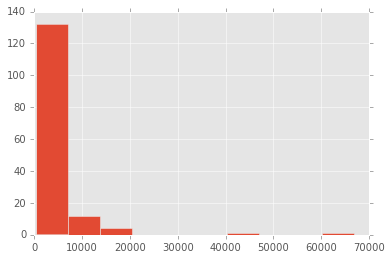

In [169]:
NEWS.views.hist()

In [170]:
NEWS = pd.DataFrame(columns=['title', 'date', 'views'])
total_pages = 100

count = 0
for page in range(total_pages):
    try:
        news_page = getPage(main_url+str(page+1))
        all_links = news_page.findAll('article', attrs= {'class':'news-line'})

        for link in all_links:
            current_page = getPage(getSubpageLink(link))

            to_append = {'title':getTitle(current_page), 'date':getDate(current_page), 'views':getViews(current_page)}
            NEWS = NEWS.append(to_append, ignore_index=True)
            count +=1 
        print('The page is {}'.format(page+1))
    except:
        print('OOps, something whent wrong with the page {}'.format(page+1))
        
NEWS.to_csv('/Users/dmitrys/Desktop/DataProjects/NEWS.csv')

The page is 1
The page is 2
The page is 3
The page is 4
The page is 5
The page is 6
The page is 7
The page is 8
The page is 9
The page is 10
The page is 11
The page is 12
The page is 13
The page is 14
The page is 15
The page is 16
The page is 17
The page is 18
The page is 19
The page is 20
The page is 21
The page is 22
The page is 23
The page is 24
The page is 25
The page is 26
The page is 27
The page is 28
The page is 29
The page is 30
The page is 31
The page is 32
The page is 33
The page is 34
The page is 35
The page is 36
The page is 37
The page is 38
The page is 39
The page is 40
The page is 41
The page is 42
The page is 43
The page is 44
The page is 45
The page is 46
The page is 47
The page is 48
The page is 49
The page is 50
The page is 51
The page is 52
The page is 53
The page is 54
The page is 55
The page is 56
The page is 57
The page is 58
The page is 59
The page is 60
The page is 61
The page is 62
The page is 63
The page is 64
The page is 65
The page is 66
The page is 67
The 

In [171]:
NEWS.tail()

,title,date,views
2995,Власти РФ решили приравнять биткоины к иностра...,"18 июля, 23:16",7 377
2996,Мутко огорчился результатами доклада ВАДА,"18 июля, 22:34",3 936
2997,Керимов решил выкупить у Прохорова 17% «Русала»,"18 июля, 21:51",2 356
2998,Путин отстранит от должностей упомянутых в док...,"18 июля, 19:49",21 379
2999,ВАДА потребовало отстранения паралимпийской сб...,"18 июля, 19:11",6 072


In [178]:
NEWS.views = NEWS.views.apply(lambda number: integerConverter(number))

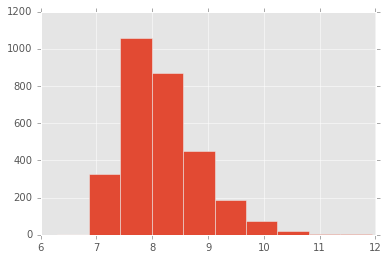

In [180]:
NEWS.views.apply(np.log).hist()

In [188]:
NEWS.describe()

,views
count,2997.000000
mean,4771.569236
std,6332.620853
min,543.000000
25%,NaN
50%,NaN
75%,NaN
max,152408.000000


In [191]:
NEWS[NEWS.views == max(NEWS.views)]

,title,date,views
414,Путин потребовал от США компенсировать потери ...,"3 октября, 16:46",152408.0
